## FireProtDB - ddG Target Class (Multiclass classification) - Random Forest Classifier ##

In [3]:
#Initial setup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

print("Setup Complete")

Setup Complete


In [5]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)
y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

In [5]:
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators' : [1100, 1500, 1750],
    'max_depth' : [5, 6, 7],
    'min_samples_split' : [5, 6],
    'min_samples_leaf' : [5, 6], 
    'oob_score' : [True]
}

## Test size 20% ##

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
rf_classifier = RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1500, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print("Random Forest accuracy score : {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(rf_classifier.score(X_train, y_train)))

Random Forest accuracy score : 0.816233
Training set score: 0.8117


## Test size 30% ##

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
rf_classifier = RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1500, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print("Random Forest test score : {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(rf_classifier.score(X_train, y_train)))

Random Forest test score : 0.816139
Training set score: 0.8129


## Grid search, and best params at 20% ##

In [13]:
grid_search_cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=0, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print('Best Parameters: ', best_params)
print('Best Model: ', best_model)

best_accuracy = grid_search_cv.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy:.2f}')

Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 1100, 'oob_score': True}
Best Model:  RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=1100, oob_score=True, random_state=42)
Best Cross-Validation Accuracy: 0.82


## Best parameters ##

In [9]:
rf_classifier = RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=1100, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Random Forest test set accuracy score : {0:04f}".format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(rf_classifier.score(X_train, y_train)))

Random Forest test set accuracy score : 0.846861
Training set score: 0.8340


## Evaluation ##

**Default parameters**

In [31]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       345
           1       0.80      0.95      0.87       607
           2       0.93      0.52      0.67        27

    accuracy                           0.82       979
   macro avg       0.86      0.69      0.75       979
weighted avg       0.82      0.82      0.81       979



**Best parameters**

In [17]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       216
           1       0.84      0.95      0.89       420
           2       0.89      0.47      0.62        17

    accuracy                           0.85       653
   macro avg       0.86      0.70      0.76       653
weighted avg       0.85      0.85      0.84       653



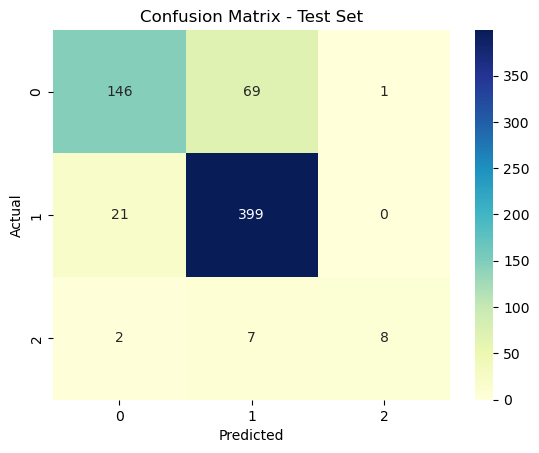

In [12]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature importance**

asa: 0.290
b_factor: 0.420
pH: 0.036
Instability index: 0.026
Isoelectric point: 0.057
Hydrophobicity: 0.023
Aromaticity: 0.028
Molecular weight: 0.033
Fraction helix: 0.025
Fraction turn: 0.032
Fraction sheet: 0.029


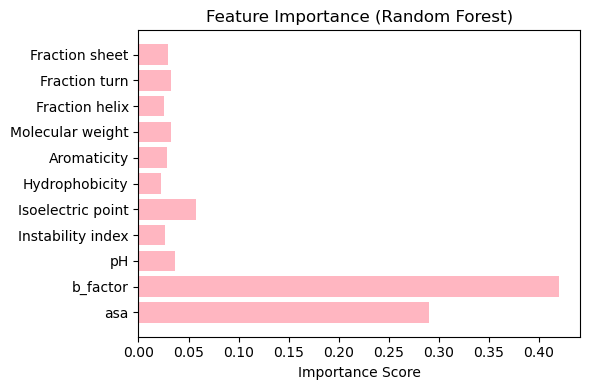

In [15]:
feature_names = X.columns.tolist() 

importances = rf_classifier.feature_importances_
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.3f}")

plt.figure(figsize=(6, 4))
plt.barh(feature_names, importances, color="lightpink")
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

## ROC Curve ##

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
classes = [0, 1, 2]

y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_classifier.fit(X_train, y_train).predict_proba(X_test)

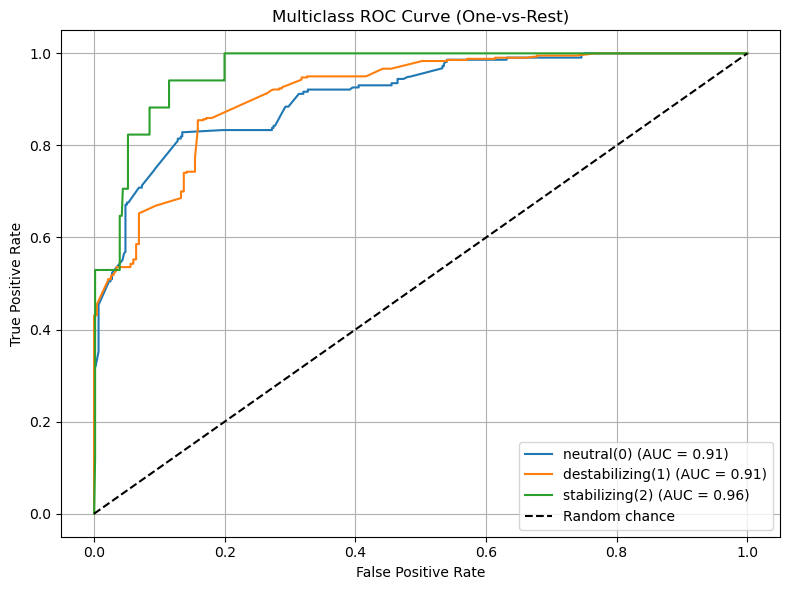

In [16]:
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    label_name = {0: "neutral(0)", 1: "destabilizing(1)", 2: "stabilizing(2)"}[class_label]
    plt.plot(fpr, tpr, label=f"{label_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Precision-Recall Curve ##

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score
)

classes = [0, 1, 2]
label_names = {0: "neutral(0)", 1: "destabilizing(1)", 2: "stabilizing(2)"}

y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_classifier.fit(X_train, y_train).predict_proba(X_test)

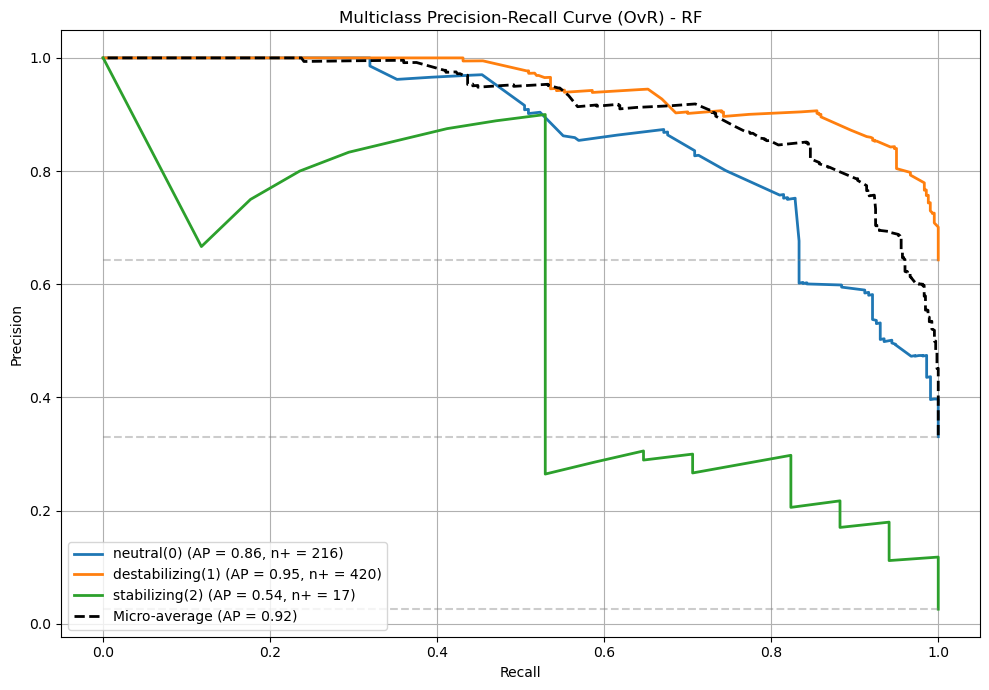

In [16]:
plt.figure(figsize=(10, 7))

# Plot PR curve for each class
for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    positive_rate = y_test_bin[:, i].mean()  # for dashed baseline
    n_positives = int(y_test_bin[:, i].sum())  # count of positive samples

    plt.plot(
        recall,
        precision,
        lw=2,
        label=f"{label_names[class_label]} (AP = {avg_precision:.2f}, n+ = {n_positives})"
    )

    # Dashed baseline for positive class prevalence
    plt.hlines(
        positive_rate, 0, 1, colors='gray', linestyles='dashed', alpha=0.4
    )

# Micro-average Precision-Recall curve
precision_micro, recall_micro, _ = precision_recall_curve(
    y_test_bin.ravel(), y_score.ravel()
)
ap_micro = average_precision_score(y_test_bin, y_score, average='micro')

plt.plot(
    recall_micro,
    precision_micro,
    color='black',
    linestyle='--',
    lw=2,
    label=f"Micro-average (AP = {ap_micro:.2f})"
)

# Final plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision-Recall Curve (OvR) - RF")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()